In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
from imutils import face_utils

# Метод детекції облич Віоли-Джонса

In [2]:
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [3]:
titanic = cv2.imread('titanic.jpg')

<function matplotlib.pyplot.show(close=None, block=None)>

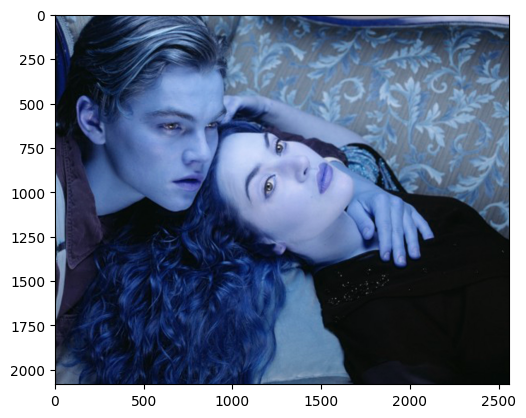

In [4]:
plt.imshow(titanic)
plt.show

In [5]:
gray_image = cv2.cvtColor(titanic, cv2.COLOR_RGB2GRAY)

<function matplotlib.pyplot.show(close=None, block=None)>

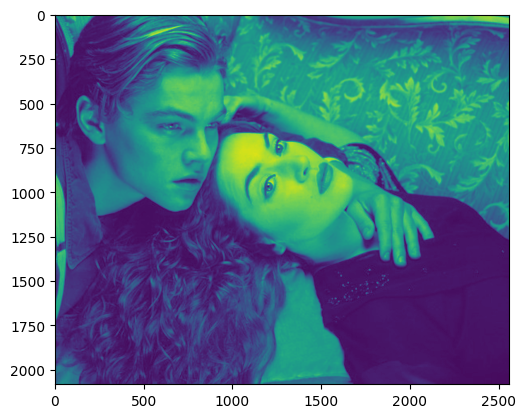

In [6]:
plt.imshow(gray_image)
plt.show

In [7]:
image_rotate = cv2.rotate(gray_image, cv2.ROTATE_90_CLOCKWISE)

<function matplotlib.pyplot.show(close=None, block=None)>

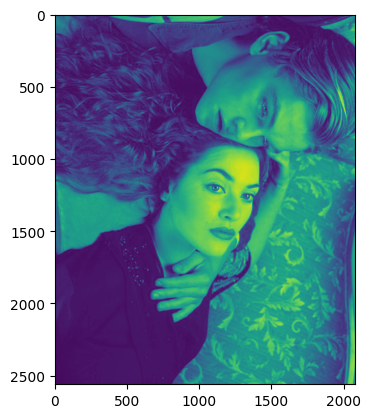

In [8]:
plt.imshow(image_rotate)
plt.show

In [9]:
faces = face_cascade.detectMultiScale(gray_image, 1.3, 5)

In [10]:
faces_rotate = face_cascade.detectMultiScale(image_rotate, 1.3, 5)

In [11]:
faces_rotate

array([[848, 954, 727, 727]])

In [12]:
faces

array([[2138,  638,   97,   97],
       [ 376,  346,  800,  800],
       [  60, 1285,   53,   53]])

In [13]:
for (x, y, w, h) in faces:
    cv2.rectangle(titanic, (x, y), (x+w, y+h), (255, 0, 0), 2)

In [14]:
for (x, y, w, h) in faces_rotate:
    cv2.rectangle(image_rotate, (x, y), (x+w, y+h), (255, 0, 0), 2)

<function matplotlib.pyplot.show(close=None, block=None)>

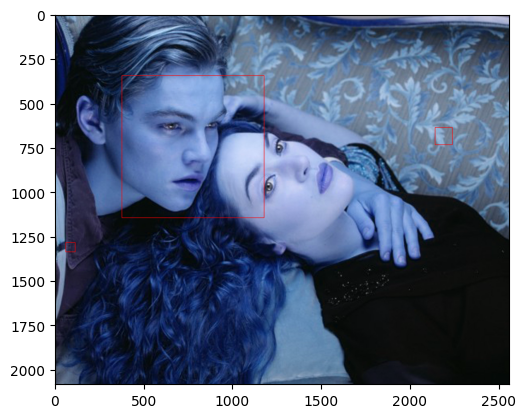

In [15]:
plt.imshow(titanic)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

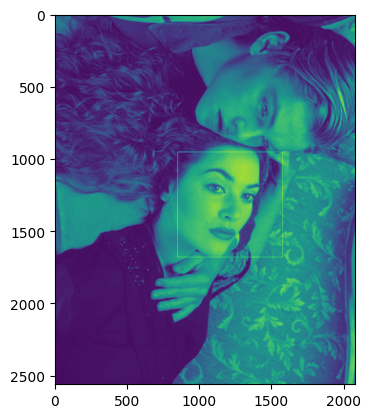

In [16]:
plt.imshow(image_rotate)
plt.show

# Метод детекції облич HOG в Dlib

In [17]:
image_tit = cv2.imread('titanic.jpg', 0)

In [19]:
img = np.float32(image_tit) / 255.0

In [23]:
gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=5)

In [24]:
gy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=5)

In [25]:
mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

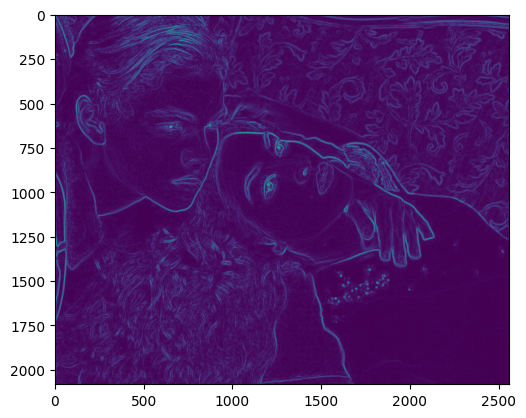

In [26]:
plt.imshow(mag)
plt.show()

In [27]:
face_detect = dlib.get_frontal_face_detector()
rects = face_detect(image_tit, 1)

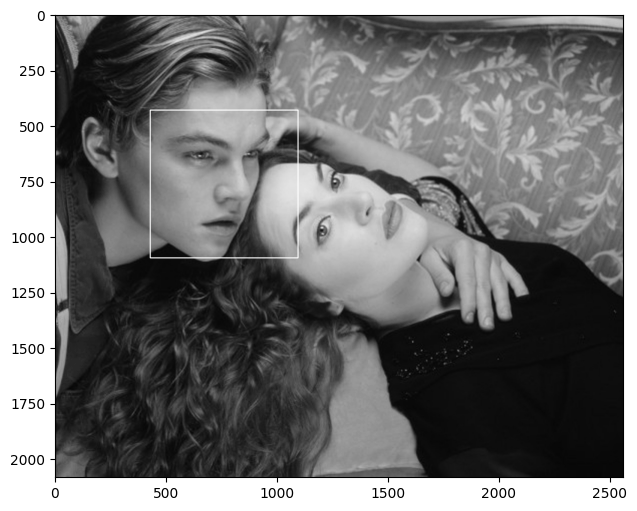

In [28]:
for (i, rect) in enumerate(rects):
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(image_tit, (x, y), (x + w, y + h), (255, 255, 255), 3)
    
plt.figure(figsize=(10,6))
plt.imshow(image_tit, cmap='gray')
plt.show()